# PROJEKT 2 - ANALIZA OBRAZÓW DNA OKA (SEGMENTACJA OBRAZU)

Celem projektu jest stworzenie systemu służącego do segmentacji (wykrywania) naczyń krwionośnych w obrazach dna oka oraz wykonanie eksperymentów weryfikujących jakość segmentacji.

![title](pictures/EYE.png)

Import wykorzystanych w projekcie bibliotek:

In [64]:
from pylab import *
from skimage import img_as_float, exposure
from skimage.color import rgb2gray
from skimage.filters import frangi, hessian, sobel, sato, meijering
from skimage.morphology import disk, dilation, erosion

In [123]:
folder = 'pictures/'
images = ['im0001.ppm', 'im0002.ppm', 'im0003.ppm', 'im0004.ppm', 'im0005.ppm', 'im0044.ppm', 'im0077.ppm',
          'im0081.ppm', 'im0082.ppm', 'im0139.ppm', 'im0162.ppm', 'im0163.ppm', 'im0235.ppm', 'im0236.ppm',
          'im0239.ppm', 'im0240.ppm', 'im0255.ppm', 'im0291.ppm', 'im0319.ppm', 'im0324.ppm']

Funkacja pomocnicza wyświetlająca pobrany jako argument obraz w odpowiednim miejscu:

In [9]:
def show_image(image, position):
    subplot(position[0], position[1], position[2])
    plt.axis('off')
    plt.imshow(image, cmap='gray')

Funkcja przetwarzająca obraz wejściowy w celu wyodrębnienia naczyń krwionośnych:

In [138]:
def process_image(image):
    image = img_as_float(image)
    image = rgb2gray(image)
    


    mask = image.copy()
    mask[mask > 0.15] = 1
    mask[mask <= 0.15] = 0
    mask = -mask
    mask = dilation(mask, disk(5))
    
    
    image = exposure.equalize_adapthist(image, clip_limit=0.05)
#     image = sobel(image)
#     image = erosion(image, disk(1))
#     image[image > 0.1] = 1
#     image = dilation(image, disk(1))
#     image = exposure.equalize_adapthist(image, clip_limit=0.1)
#     image[image >= 0] = image[image >= 0] * (-1) + 1 

#     image = frangi(image, alpha=0.1)
    image = meijering(image)

    image[mask == 0] = 0
    image = (-image) + 1
    
#     MIN = 100 / 256
#     MAX = 200 / 256
#     norm = (image - MIN) / (MAX - MIN)
#     norm[norm > 0.3] = 1
#     norm[norm < 0] = 0

    image = exposure.equalize_adapthist(image, clip_limit=0.01)
    
    return image

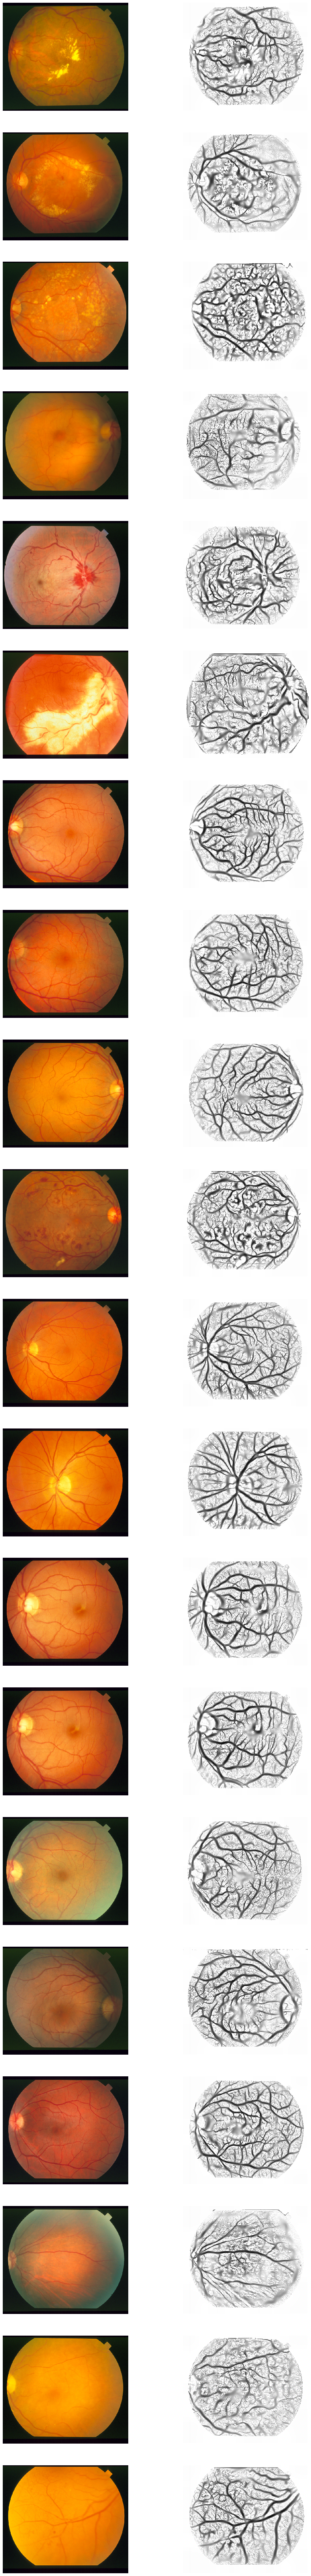

In [139]:
# images = ['im0005.ppm']
columns = 2
rows = len(images)
fig=plt.figure(figsize=(15, rows * 6))

for img in range(rows):
    
    original_image = plt.imread(folder + images[img])
    show_image(original_image, [rows, columns, img*2 + 1])
    
    processed_image = process_image(original_image)
    show_image(processed_image, [rows, columns, img*2 + 2])
   
plt.show()